In [201]:
import numpy as np
import sympy as sp
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

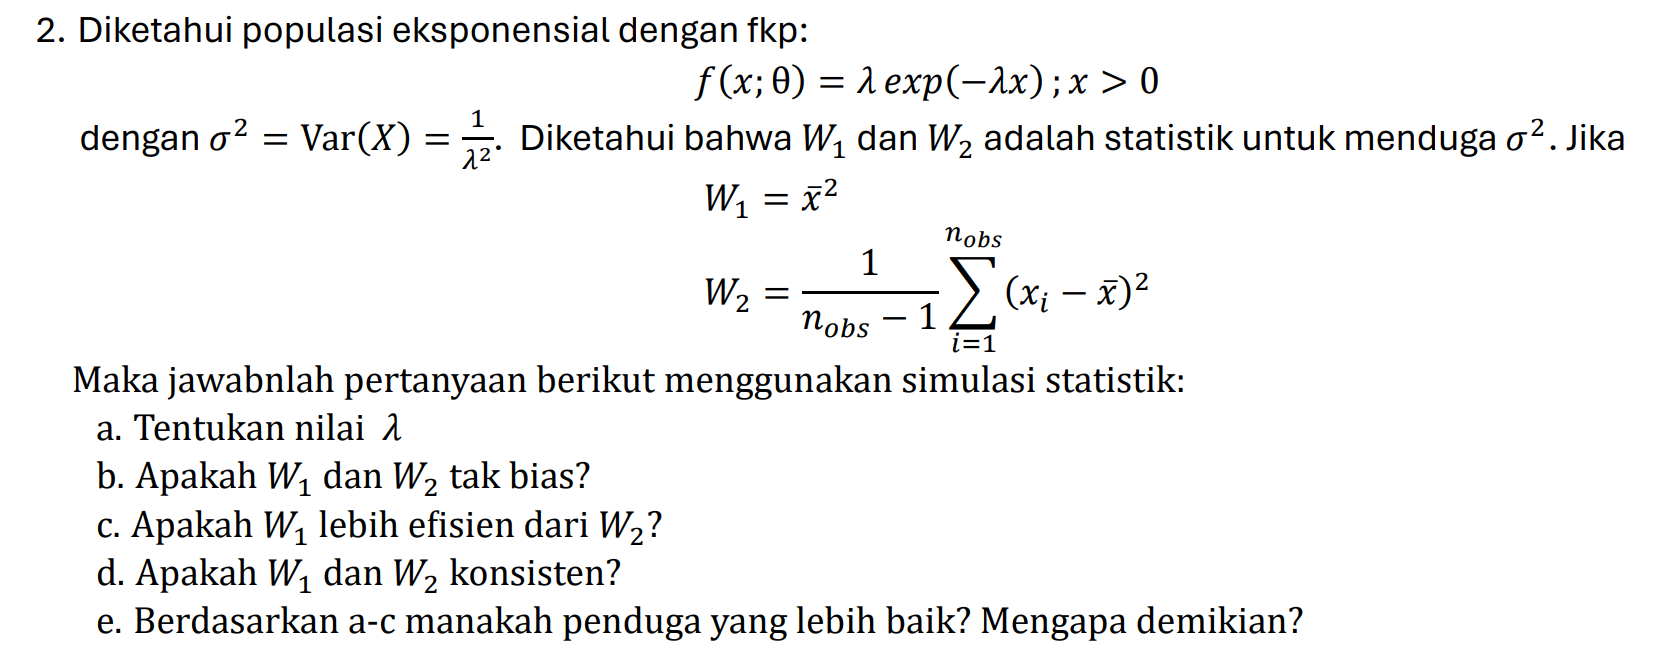

In [187]:
# params
n_sim = 500  # Number of simulations
n_obs_list = [5, 10, 50, 100, 500, 1000, 5000]  # List of different sample sizes

In [186]:
# Define the variable and the equation
Var_X = 1   
lam = 1/np.sqrt(Var_X)
sigma_2 = lam
lam

1.0

Var_X bebas diterapkan, karena akan menjadi patokkan untuk mean hasil simulasi

In [248]:
# Set seed for reproducibility
np.random.seed(4036)

# Function to peform simulation for a given sample size
def simulate_estimators(n_obs, lam, n_sim):
    W1_vals = np.zeros(n_sim)
    W2_vals = np.zeros(n_sim)
    
    for i in range(n_sim):
        x = np.random.exponential(lam, n_obs)
        x_bar = np.mean(x)
        
        W1_vals[i] = x_bar**2
        W2_vals[i] = (1 / (n_obs - 1)) * np.sum((x - x_bar)**2)
    
    return {'W1': W1_vals, 'W2': W2_vals}

# Results storage
results = {}

# Perform simulations for each sample size
for n_obs in tqdm(n_obs_list):
    results[str(n_obs)] = simulate_estimators(n_obs, lam, n_sim)

# Analyze results
bias_data = {
    'n_obs': n_obs_list, 
    'Bias_W1': np.zeros(len(n_obs_list)), 
    'Bias_W2': np.zeros(len(n_obs_list)), 
    'Rel_bias_W1': np.zeros(len(n_obs_list)), 
    'Rel_bias_W2': np.zeros(len(n_obs_list))
}
variance_data = {
    'n_obs': n_obs_list, 
    'Emp_Var_W1': np.zeros(len(n_obs_list)), 
    'Emp_Var_W2': np.zeros(len(n_obs_list))
}
consistency_data = {
    'n_obs': n_obs_list, 
    'Mean_W1': np.zeros(len(n_obs_list)), 
    'Mean_W2': np.zeros(len(n_obs_list))
}

for i, n_obs in enumerate(n_obs_list):
    W1_vals = results[str(n_obs)]['W1']
    W2_vals = results[str(n_obs)]['W2']
    
    bias_data['Bias_W1'][i] = np.mean(W1_vals) - sigma_2
    bias_data['Bias_W2'][i] = np.mean(W2_vals) - sigma_2
    
    bias_data['Rel_bias_W1'][i] = bias_data['Bias_W1'][i] / sigma_2
    bias_data['Rel_bias_W2'][i] = bias_data['Bias_W2'][i] / sigma_2
    
    variance_data['Emp_Var_W1'][i] = np.var(W1_vals, ddof=1)
    variance_data['Emp_Var_W2'][i] = np.var(W2_vals, ddof=1)
    
    consistency_data['Mean_W1'][i] = np.mean(W1_vals)
    consistency_data['Mean_W2'][i] = np.mean(W2_vals)

bias_df = pd.DataFrame(bias_data)
variance_df = pd.DataFrame(variance_data)
consistency_df = pd.DataFrame(consistency_data)

100%|██████████| 7/7 [00:00<00:00, 46.57it/s]


In [249]:
consistency_df # Mendekati Lambda

,n_obs,Mean_W1,Mean_W2
0,5,1.265701,1.014191
1,10,1.129871,1.051883
2,50,1.028426,1.009671
3,100,1.005125,0.998919
4,500,1.007515,1.005199
5,1000,0.999178,0.996048
6,5000,1.000353,1.000112


2. Apakah W1 dan W2 tak bias

In [250]:
bias_df = pd.DataFrame(bias_data)
bias_df

,n_obs,Bias_W1,Bias_W2,Rel_bias_W1,Rel_bias_W2
0,5,0.265701,0.014191,0.265701,0.014191
1,10,0.129871,0.051883,0.129871,0.051883
2,50,0.028426,0.009671,0.028426,0.009671
3,100,0.005125,-0.001081,0.005125,-0.001081
4,500,0.007515,0.005199,0.007515,0.005199
5,1000,-0.000822,-0.003952,-0.000822,-0.003952
6,5000,0.000353,0.000112,0.000353,0.000112


Karena nilai bias berubah-ubah seiring bertambahnya jumlah n observasi dan nilainya cenderung semakin kecil, maka W1 dan W2 tak bias asimtotik. 

3. Apakah W1 lebih efisien dari W2?

In [251]:
variance_df = pd.DataFrame(variance_data)
variance_df["diff varW2-varW1"] = variance_df["Emp_Var_W2"]-variance_df["Emp_Var_W1"]
variance_df

,n_obs,Emp_Var_W1,Emp_Var_W2,diff varW2-varW1
0,5,1.428448,1.326504,-0.101944
1,10,0.528196,0.914034,0.385838
2,50,0.088022,0.160957,0.072935
3,100,0.041323,0.077659,0.036336
4,500,0.007911,0.016382,0.008471
5,1000,0.004195,0.007385,0.003190
6,5000,0.000861,0.001516,0.000655


Karena nilai ragam penduga W1 lebih kecil dibandingkan W2, maka W1 lebih efisien dibandingkan W2.

4. Apalah W1 dan W2 konsisten?

In [252]:
pd.concat((bias_df, variance_df.iloc[:,1:3]), axis=1)

,n_obs,Bias_W1,Bias_W2,Rel_bias_W1,Rel_bias_W2,Emp_Var_W1,Emp_Var_W2
0,5,0.265701,0.014191,0.265701,0.014191,1.428448,1.326504
1,10,0.129871,0.051883,0.129871,0.051883,0.528196,0.914034
2,50,0.028426,0.009671,0.028426,0.009671,0.088022,0.160957
3,100,0.005125,-0.001081,0.005125,-0.001081,0.041323,0.077659
4,500,0.007515,0.005199,0.007515,0.005199,0.007911,0.016382
5,1000,-0.000822,-0.003952,-0.000822,-0.003952,0.004195,0.007385
6,5000,0.000353,0.000112,0.000353,0.000112,0.000861,0.001516


Karena ketika jumlah objek pengamatan contoh semakin banyak, nilai ragam dan bias mendekati nilai nol, maka W1 dan W2 konsisten.

5. Penduga terbaik

Gunakan W1, karena pada pengetesan efisien. W1 lebih efisien daripada W2

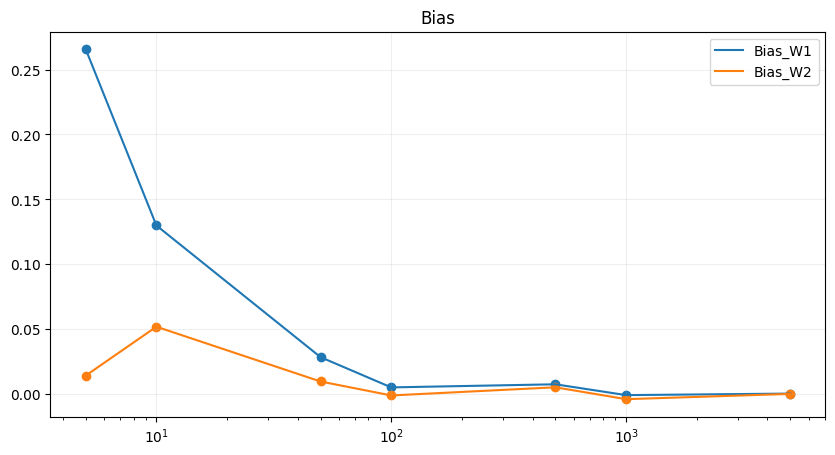

In [253]:
# Bias
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.2)
ax.set_title("Bias")
for i in range(2):
    ax.scatter(n_obs_list, bias_df[bias_df.columns[i+1]],)
    ax.plot(n_obs_list, bias_df[bias_df.columns[i+1]], label=bias_df.columns[i+1])
ax.legend(loc="upper right")
ax.set_xscale("log")

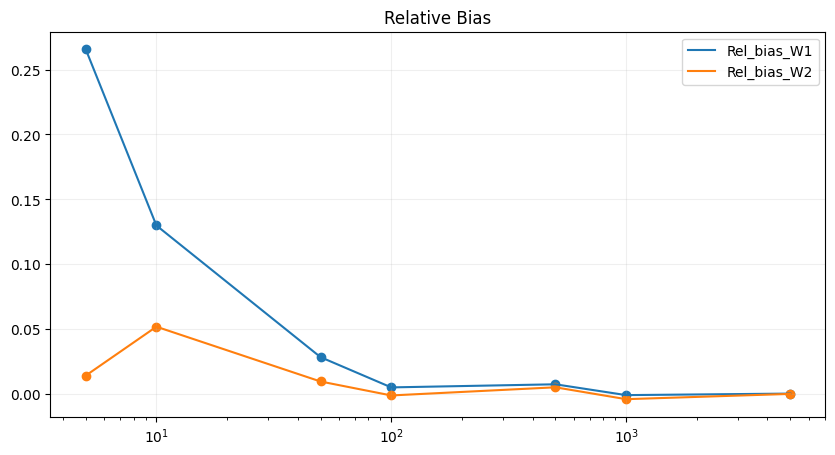

In [241]:
# Relative Bias
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.2)
ax.set_title("Relative Bias")
for i in range(2):
    ax.scatter(n_obs_list, bias_df[bias_df.columns[i+3]])
    ax.plot(n_obs_list, bias_df[bias_df.columns[i+3]], label=bias_df.columns[i+3])
ax.legend(loc="upper right")
ax.set_xscale("log")

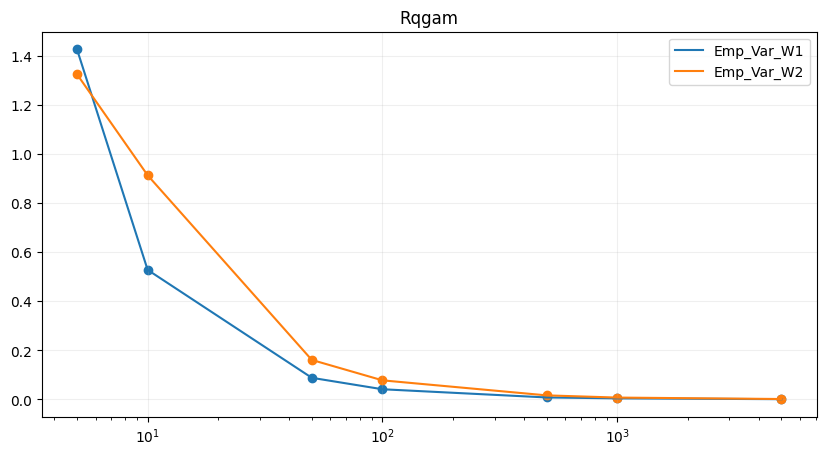

In [242]:
# Ragam
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.2)
ax.set_title("Rqgam")
for i in range(2):
    ax.scatter(n_obs_list, variance_df[variance_df.columns[i+1]])
    ax.plot(n_obs_list, variance_df[variance_df.columns[i+1]], label=variance_df.columns[i+1])
ax.legend(loc="upper right")
ax.set_xscale("log")

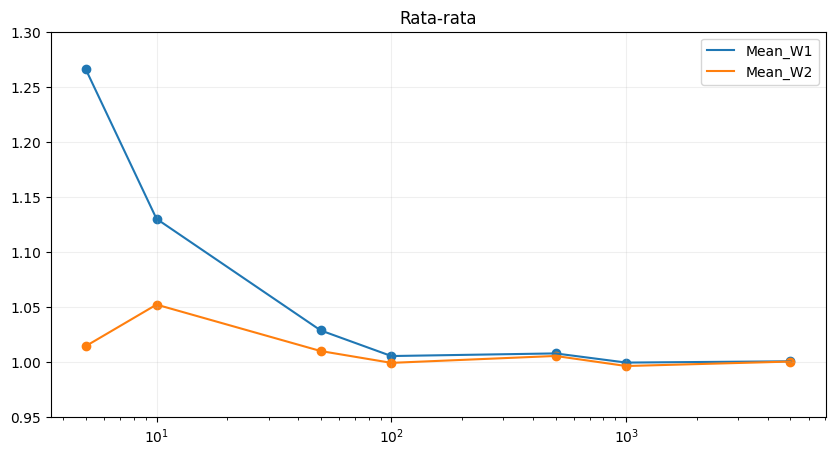

In [243]:
# Rata-rata
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.grid("on", alpha=0.2)
ax.set_title("Rata-rata")
ax.set_ylim(0.95,1.3)
for i in range(2):
    ax.scatter(n_obs_list, consistency_df[consistency_df.columns[i+1]])
    ax.plot(n_obs_list, consistency_df[consistency_df.columns[i+1]], label=consistency_df.columns[i+1])
ax.legend(loc="upper right")
ax.set_xscale("log")